<a href="https://colab.research.google.com/github/HanGyeolN/CampusProject/blob/master/mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1번문제
- 이름 -> 알파벳 -> 알파벳 문자 비율의 변화는?



In [0]:
# 1880 ~ 2011 파일 모두 열어서 하나로 합치기.

years = range(1880, 2011)
names = None
year_list = []

for year in years:
  path = "/content/yob"+str(year)+".txt"
  frame = pd.read_csv(path, names = ["names", "sex", "births"])
  frame['year'] = year
  year_list.append(frame)
  
names = pd.concat(year_list, ignore_index=True)

In [0]:
# 1. 연도별 모든 이름을 합친다.
year_names = names.groupby(['year'])['names'].sum()
year_names.head()

year
1880    MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...
1881    MaryAnnaEmmaElizabethMargaretMinnieIdaAnnieBer...
1882    MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...
1883    MaryAnnaEmmaElizabethMinnieMargaretBerthaIdaAn...
1884    MaryAnnaEmmaElizabethMinnieMargaretIdaClaraBer...
Name: names, dtype: object

In [0]:
# 2. 연도별로 알파벳을 추출해서 빈도수를 계산한다.

alpha_year = []

for lowered_names in map(str.lower, year_names.values): 
  # 이름을 소문자로 만든다
  
  alpha_dict = {}
  # 1년마다 알파벳 딕셔너리를 초기화
  
  for alpha in lowered_names: 
    # 소문자 이름들의 각 알파벳에 대해서 
    
    if alpha in alpha_dict: # 센 적이 있으면 1을 더하고
      alpha_dict[alpha] += 1

    else: # 센 적이 없으면 1
      alpha_dict[alpha] = 1
      
  alpha_year.append(alpha_dict)
  
apy = pd.DataFrame(alpha_year, index=[year for year in range(1880, 2011)])

apy.head()


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
1880,1383,197,307,415,1556,104,159,357,950,107,65,1049,396,865,657,118,6,851,498,535,270,149,112,13,235,46
1881,1332,197,289,383,1505,106,164,327,927,108,63,1010,377,845,618,116,5,825,478,504,265,142,115,17,216,46
1882,1475,227,325,428,1684,123,160,377,1018,117,66,1117,407,925,685,123,5,911,516,569,291,167,128,20,253,58
1883,1435,204,330,413,1666,111,167,357,1022,108,65,1104,418,904,678,127,6,889,496,547,260,156,116,16,230,48
1884,1597,253,341,478,1828,120,191,391,1100,124,73,1211,431,994,740,129,4,987,561,621,301,183,126,19,269,58


In [0]:
# 3. 빈도수에 대해 내림차순 정렬
apy.sum().sort_values(ascending=False)

a    1581385
e    1271448
n     955219
i     854278
l     788930
r     777881
o     495375
s     453336
t     432640
d     359456
h     347252
y     336268
m     323103
c     267819
k     187123
u     185482
j     147443
b     141800
v     127034
g     117219
f      64163
p      62921
w      62101
z      59259
q      23243
x      15182
dtype: int64

### 1.2번문제
 - 과거에는 인기가 없었으나 최근 인기있는 이름은?

In [0]:
# 1. 연도별 이름수를 구한다
name_history = names.pivot_table('births', index='year', columns='names', aggfunc=sum)
name_history.head()

names,Aaban,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,Aadhya,Aadi,Aadil,Aadin,Aadison,Aadit,Aadith,Aaditri,Aaditya,Aadon,Aadya,Aadyn,Aafreen,Aage,Aagot,Aahan,Aahana,Aahil,Aahliyah,Aahna,Aahron,Aaidan,Aaiden,Aaila,Aailiyah,Aailyah,Aaira,Aairah,Aaisha,Aaishah,...,Zyonna,Zyonnah,Zyonne,Zyquan,Zyquarius,Zyquavion,Zyquavious,Zyquez,Zyra,Zyrah,Zyran,Zyree,Zyreion,Zyrek,Zyrell,Zyren,Zyreon,Zyrese,Zyrhiana,Zyria,Zyriah,Zyrian,Zyriana,Zyrianna,Zyrie,Zyriel,Zyrihanna,Zyrion,Zyriyah,Zyron,Zyrus,Zysean,Zyshaun,Zyshawn,Zyshon,Zyshonne,Zytavious,Zyvion,Zyyanna,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


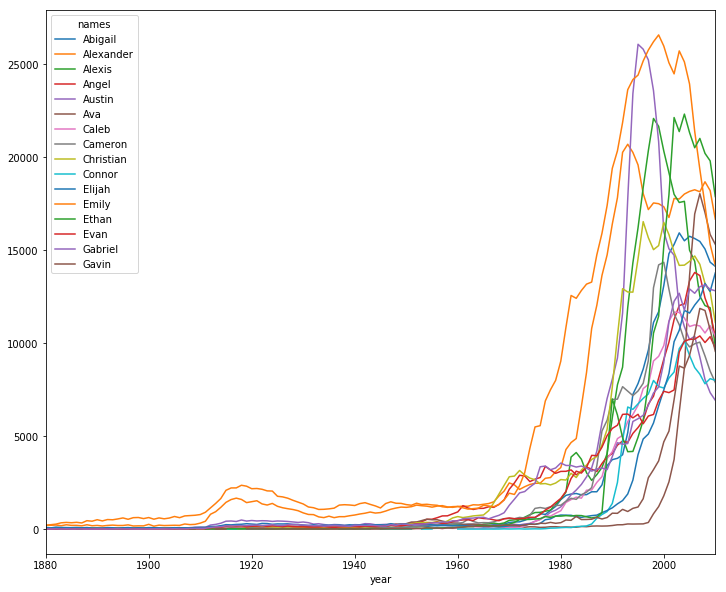

In [0]:
# 2. 이름별로 숫자가 증가 추세인 이름을 찾아서 plot한다.

name_store = []

for i, name in enumerate(name_history.columns):
  if i > 30000:
    break
  
  if name_history[name].iloc[120:].mean() - name_history[name].iloc[90:110].mean() > 6000:
    if (name_history[name].iloc[50:90].mean() - name_history[name].iloc[:50].mean()) >= 0:
      name_store.append(name)

name_history[name_store].plot(figsize=(12,10))

### 1.3번문제
- 남 여 이름의 인기가 바뀐 이름은?

In [0]:
names_diff = names.pivot_table('births', index='year', columns=['names', 'sex'], aggfunc=sum)

In [0]:
names_diff['Aaban']

## 2번 문제
- 연도, 제목을 추출하는 정규표현식 작성 -> year, title 컬럼 생성
- 장르 -> 원핫인코딩

#### 2.1 연도, 제목을 추출하는 정규표현식 작성 -> year, title 컬럼 생성

In [0]:
import re

data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [0]:
title = "One Flew Over the Cuckoo's Nest (1975)"
temp = re.search('[(][0-9]{4}[)]$', title)

print(temp[0][1:-1]) # 년도 부분

print(title[:temp.regs[0][0]]) # 제목 부분


1975
One Flew Over the Cuckoo's Nest 


In [0]:
# 1. 영화 이름에서 날짜와 제목을 추출한다

movie_list = []

for movie_id, title in enumerate(movies['title']):
  temp_dict = {}
  
  res = re.search('[(][0-9]{4}[)]$', title)
  
  temp_dict['year'] = res[0][1:-1]
  temp_dict['title'] = title[:res.regs[0][0]]
  
  # 딕셔너리 추가 
  movie_list.append(temp_dict)


title_year_df = pd.DataFrame(movie_list)
title_year_df['movie_id'] = movies['movie_id']
title_year_df.head()
#movies.merge(title_year_df, how='inner', left_on='movie_id')
  
print(len(movies), len(title_year_df))      
  

,title,year,movie_id
0,Toy Story,1995,1
1,Jumanji,1995,2
2,Grumpier Old Men,1995,3
3,Waiting to Exhale,1995,4
4,Father of the Bride Part II,1995,5


In [0]:
# 2. 원래 데이터에 합친다. 
movies.merge(title_year_df, how='inner', on='movie_id').tail()


,movie_id,title_x,genres,title_y,year
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents,2000
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream,2000
3880,3950,Tigerland (2000),Drama,Tigerland,2000
3881,3951,Two Family House (2000),Drama,Two Family House,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,"Contender, The",2000


## 2.2 장르 -> 원핫인코딩

In [0]:
# 1. 장르 여러개있는거를 하나로만 

genres = []
for i, movie in enumerate(movies['genres']):
  temp_dict = {}
  #if i > 10:
  #  break
  
  temp_dict['genres'] = movie.split('|')[0]
  
  genres.append(temp_dict)

movies['genres'] = pd.DataFrame(genres)
  
 

In [0]:
# 2. one-hot
pd.get_dummies(movies['genres'])

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,aaa
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
